Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data

In [34]:
train_df = pd.read_csv('../data/training.csv')
val_df = pd.read_csv('../data/validation.csv')
test_df = pd.read_csv('../data/test.csv')

### Initial Analysis

Checking the first 5 rows of each dataframe

In [35]:
train_df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [36]:
val_df.head()

,text,label
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,3
4,i can have for a treat or if i am feeling festive,1


In [37]:
test_df.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


It is clearly visible that the labels are encoded already using default number coding (not One-hot labeling). Now, let's do further analysis

Let's get basic info about the shape of dfs

In [38]:
train_df.shape

(16000, 2)

In [39]:
val_df.shape

(2000, 2)

In [40]:
test_df.shape

(2000, 2)

Overall : The dataset is divided into three subsets for machine learning purposes.

- Training set: 16,000 records (80% of the total)

- Validation set: 2,000 records (10% of the total)

- Test set: 2,000 records (10% of the total). 

This represents a standard 80-10-10 split

### Missing Values Analysis

In [41]:
train_df.isna().sum()

text     0
label    0
dtype: int64

In [42]:
val_df.isna().sum()

text     0
label    0
dtype: int64

In [43]:
test_df.isna().sum()

text     0
label    0
dtype: int64

We can clearly see that there are no missing values. Let's also check for empty string values. I also will create dictionary for easy looping over datasets

In [44]:
datasets = {
    "Train": train_df,
    "Validation": val_df,
    "Test": test_df
}

In [45]:
# Check for empty strings in 'text' column across all datasets
for name, df in datasets.items():
    empty_text_count = (df['text'].str.strip() == '').sum()
    print(f"Empty strings in 'text' column of {name.lower()}_df: {empty_text_count}")

Empty strings in 'text' column of train_df: 0
Empty strings in 'text' column of validation_df: 0
Empty strings in 'text' column of test_df: 0


Overall: 

- There is no empty values in the datasets
- There is no empty string values in the datasets

### Class Distribution Analysis

Now we are ready for further analysis. Let's check the class distribution

In [46]:
# Counting labels across all datasets
label_counts = {}
for name, df in datasets.items():
    label_counts[name.lower()] = df["label"].value_counts().sort_index()

Let's visualize the distribution. I will use mapping for each category. Due to the reason that the order in the Read2 file of emotions do not correspond with the numerical order i analyzed the labeling myself to create a label mapping

In [47]:
for label in sorted(train_df["label"].unique()):
    print(f"\n===== LABEL {label} =====")
    print(train_df[train_df["label"] == label]["text"].sample(5, random_state=42).values)



===== LABEL 0 =====
['im feeling so lousy they tried to cheer me up during school time and during choir practice'
 'i feel highly disadvantaged'
 'i feel humiliated to introduce you to my colleagues as my wife'
 'i feel so worthless during those times i was struggling finding work'
 'i still miss him and feel rather weepy today']

===== LABEL 1 =====
['i feel im rather innocent in that respect'
 'im feeling quite adventurous and tried out those drinks that i just normally read through the pages of pocketbooks'
 'im feeling much more positive about the impending move'
 'i feel like i spend most of my time over thinking and over analyzing pretty much everything'
 'i suspect those might also be factors in making him not feel rich']

===== LABEL 2 =====
['i mean fuck i feel like i was way more considerate with customers and concerned about appearance and sanitiation snoozel pm but fine'
 'i remember a couple of years ago i was feeling romantic and dreamy and asked him wonder if we ll cele

In [49]:
label_map = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}

# colors of labels
label_colors = {
    0: "#3498db",  # sadness - blue
    1: "#f1c40f",  # joy - yellow
    2: "#e91e63",  # love - pink
    3: "#e74c3c",  # anger - red
    4: "#8e44ad",  # fear - purple
    5: "#2ecc71",  # surprise - green
}

Function for piechart

In [50]:
def plot_pie(ax, counts, title):
    labels = [label_map[i] for i in counts.index]
    colors = [label_colors[i] for i in counts.index]

    ax.pie(
        counts.values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops={"edgecolor": "black"}
    )
    ax.set_title(title)


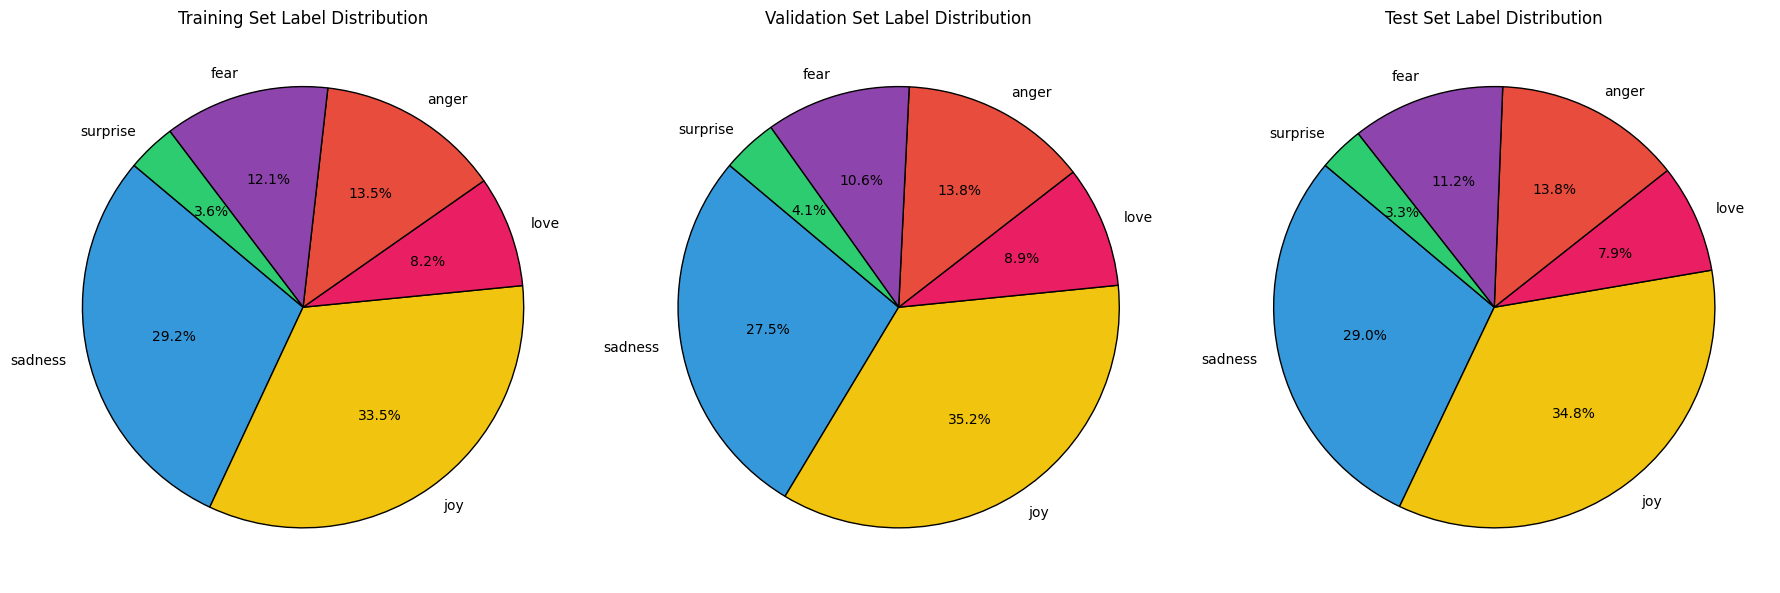

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

plot_pie(axes[0], label_counts['train'], "Training Set Label Distribution")
plot_pie(axes[1], label_counts['validation'], "Validation Set Label Distribution")
plot_pie(axes[2], label_counts['test'], "Test Set Label Distribution")

plt.tight_layout()
plt.show()

Overall :

- Dominant Classes: Joy (33.5-35.2%) and Sadness (27.5-29.2%) dominate all sets

- Minority Classes: Surprise (3.3-4.1%) is the least common, while Love (7.9-8.9%) and Fear (10.6-12.1%) are underrepresented.

- Balance Across Sets: Distributions are highly similar, suggesting a stratified split that preserves overall proportions.

Implications: The imbalance may bias models toward majority classes.

### Text Length Distribution Analysis

Now let's analize the length of the text column (length in symbols and length in words)

In [52]:
# Length of text column in symbols and word count for each dataset (Adding a new column for each dataset)
for df in datasets.values():
    df["text_length_chars"] = df["text"].str.len()
    df["text_length_words"] = df["text"].str.split().str.len()

Let's visualize



In [53]:
# Data preparation (one time)
combined_df = pd.concat(
    [
        train_df.assign(dataset="Train"),
        val_df.assign(dataset="Validation"),
        test_df.assign(dataset="Test")
    ],
    ignore_index=True
)

Distribution of text length in characters

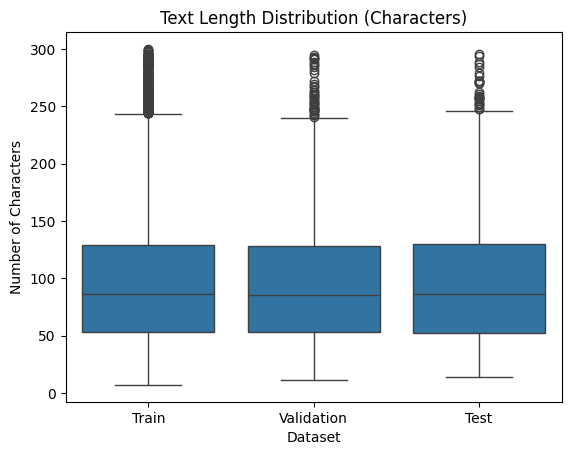

In [54]:
sns.boxplot(
    x="dataset",
    y="text_length_chars",
    data=combined_df
)
plt.title("Text Length Distribution (Characters)")
plt.xlabel("Dataset")
plt.ylabel("Number of Characters")
plt.show()


Distribution of text length in words

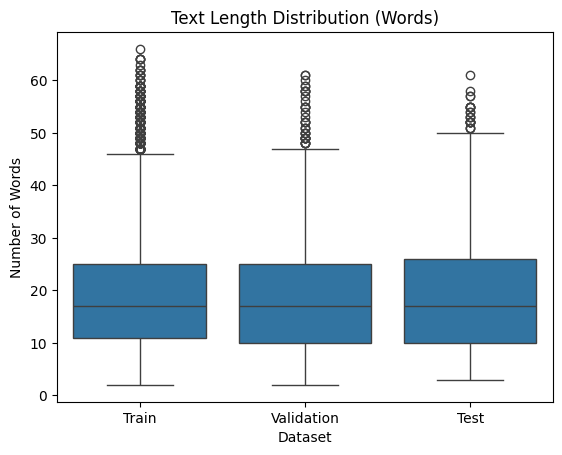

In [55]:
sns.boxplot(
    x="dataset",
    y="text_length_words",
    data=combined_df
)
plt.title("Text Length Distribution (Words)")
plt.xlabel("Dataset")
plt.ylabel("Number of Words")
plt.show()

The boxplots above illustrate the distribution of text lengths measured in terms of **number of characters** and **number of words** across the **training, validation, and test datasets**.

For both character count and word count, a large number of **outliers** can be observed in all three dataset splits. These outliers correspond to texts that are significantly longer than the majority of samples. Despite this, the **median values** and **interquartile ranges (IQR)** remain very similar across the training, validation, and test sets, indicating that the data splitting process was consistent and did not introduce any noticeable bias.

The presence of numerous outliers suggests that while most texts are relatively short to medium in length, a smaller subset of samples contains much longer messages. This pattern is common in real-world textual datasets and does not necessarily indicate data quality issues.

Overall, these observations confirm that:
- The dataset is dominated by short to medium-length texts
- Longer texts exist but represent only a minority of the data
- Text length distributions are consistent across training, validation, and test splits for both characters and words

These findings support the use of **TF-IDF-based feature extraction**, which is well-suited for handling sparse representations and variable-length text data.



### Text Length Distribution by Emotion

Order and labels of emotions

In [56]:
emotion_order = list(label_map.values())
palette = [label_colors[i] for i in sorted(label_colors.keys())]

Characters: Distribution of text length by class

C:\Users\Kamal Mustafayev\AppData\Local\Temp\ipykernel_15348\748986597.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


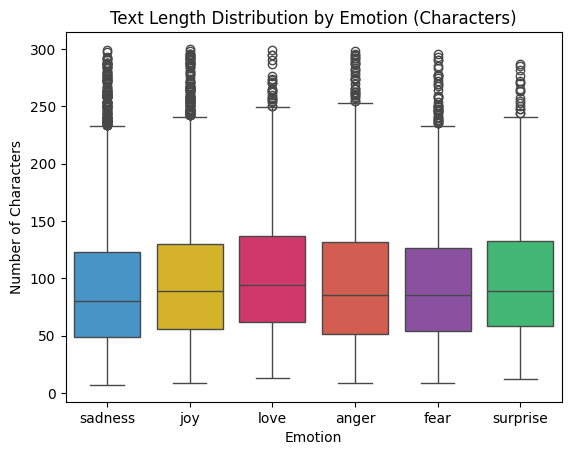

In [57]:
sns.boxplot(
    x=train_df["label"].map(label_map),
    y=train_df["text_length_chars"],
    order=emotion_order,
    palette=palette
)

plt.title("Text Length Distribution by Emotion (Characters)")
plt.xlabel("Emotion")
plt.ylabel("Number of Characters")
plt.show()


Words: Distribution of text length by class

C:\Users\Kamal Mustafayev\AppData\Local\Temp\ipykernel_15348\3882045665.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


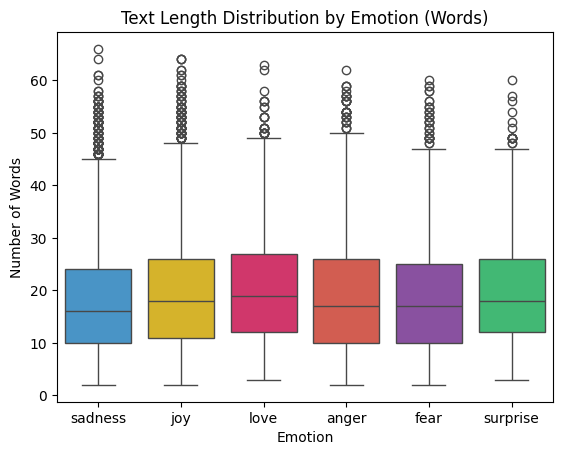

In [58]:
sns.boxplot(
    x=train_df["label"].map(label_map),
    y=train_df["text_length_words"],
    order=emotion_order,
    palette=palette
)

plt.title("Text Length Distribution by Emotion (Words)")
plt.xlabel("Emotion")
plt.ylabel("Number of Words")
plt.show()


The boxplots above illustrate the distribution of text lengths measured in terms of **number of characters** and **number of words** across different emotion classes in the training dataset.

Overall, the median text lengths are relatively similar across emotion categories, suggesting that most emotions are expressed using comparable text lengths. Some variation can be observed in the spread and number of outliers among different classes, indicating that certain emotions may occasionally be expressed with longer or more detailed texts.

However, all emotion classes are dominated by short to medium-length texts, and no clear separation between classes can be achieved based solely on text length. This suggests that text length alone is not a strong discriminative feature for emotion classification.

Therefore, semantic information captured through **TF-IDF-based feature extraction** is expected to play a more significant role in distinguishing between different emotion classes.
